# Visualising time trends using animation and interactive streams

# This week's exercise tests your abilities in the following:

 - Preparing your data for animation
 - Animating your charts, encoding one of the dimensions as an animpation.
 - Making the chart more attractive and memorable.

 - Using stream charts interactively

# 1. Prepare

 - Load the libraries (you will need tidyverse, probably zoo, gganimate and gifski.
 - set the base theme to theme_bw()
 - Make sure you have a folder allocated for your GIFs.

In [75]:
shhh <- suppressPackageStartupMessages # It's a library, so shhh!warnings
shhh(library(tidyverse))
library(gganimate)
theme_set(theme_bw())

## 2. Source your data

The Irish Weather monitoring service, Met Eireann, publishes data that has been collected at weather stations over the years.  The data recorded can be hourly, daily or monthly.  Let's focus on monthly data this time around.

 - Go to https://data.gov.ie/organization/meteireann.  In the search box, look for monthly data.  Pick a weather station, first checking that there is valid data there.  
 - Read the data into a dataframe.
 - Remember that some of the datasets start with comments (see sample code, week 3).
 - Make sure that the dataset you choose has month and year values (or dates, that you can convert to month and year) and that every row has a value for month and year.

In [76]:
mydata = file.path("C:","Users","markc","Desktop","DataVisuals","datasets")

datapath <-file.path(mydata,'weather.csv')
dfdub<-read.csv(datapath)
head(dfdub)



,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
1,2004,8,15.8,21.4,8.7,18.5,13.1,138.2,4.6,10.7,36,NA
2,2004,9,14.7,23.2,7.2,17.7,11.7,93.7,3.5,12.7,48,NA
3,2004,10,10.5,16.3,3.5,13.6,7.5,143.7,-1.1,13.7,50,NA
4,2004,11,9.7,14.6,2.5,11.9,7.5,24.9,-3.7,10.9,41,NA
5,2004,12,8.5,14.2,0.6,10.5,6.4,49.7,-1.8,12.9,68,NA
6,2005,1,7.9,13.4,0.9,10.4,5.5,75.1,-5.0,17.1,71,NA


## 3. Check out your data:
 - What is the structure? (str)
 - Check the summary - what is the range of each value?  Are there many NAs?
 - How many unique values are there for each variable?
     - df %>% summarise_all(n_distinct)
 - Is there any column that only has a few values, so could be used for small multiples or stacking?
 - Are there columns that have more or less the same range of values?  Maybe that could be pivoted and used for stacking?
 - Is there any column you could use to change the size in a point chart?

In [3]:
str(dfdub)

'data.frame':	233 obs. of  12 variables:
 $ year : int  2004 2004 2004 2004 2004 2005 2005 2005 2005 2005 ...
 $ month: int  8 9 10 11 12 1 2 3 4 6 ...
 $ meant: num  15.8 14.7 10.5 9.7 8.5 7.9 6 8 8.7 14.5 ...
 $ maxtp: num  21.4 23.2 16.3 14.6 14.2 13.4 13.6 13.6 13.9 21.5 ...
 $ mintp: num  8.7 7.2 3.5 2.5 0.6 0.9 -0.7 0.1 1.7 7.1 ...
 $ mnmax: num  18.5 17.7 13.6 11.9 10.5 10.4 8.5 10.2 11.8 17.3 ...
 $ mnmin: num  13.1 11.7 7.5 7.5 6.4 5.5 3.5 5.9 5.6 11.6 ...
 $ rain : num  138.2 93.7 143.7 24.9 49.7 ...
 $ gmin : num  4.6 3.5 -1.1 -3.7 -1.8 -5 -8.5 -6.3 -2.1 1.4 ...
 $ wdsp : num  10.7 12.7 13.7 10.9 12.9 17.1 12.3 12 11.6 9.7 ...
 $ maxgt: int  36 48 50 41 68 71 52 38 47 32 ...
 $ sun  : logi  NA NA NA NA NA NA ...


In [4]:
unique(dfdub$year)

[1] 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
[16] 2019 2020 2021 2022 2023 2024

In [5]:
unique(dfdub$month)

[1]  8  9 10 11 12  1  2  3  4  6  7  5

In [6]:
head(dfdub,2)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
1,2004,8,15.8,21.4,8.7,18.5,13.1,138.2,4.6,10.7,36,NA
2,2004,9,14.7,23.2,7.2,17.7,11.7,93.7,3.5,12.7,48,NA


In [7]:
dfdub %>% summarise_all(n_distinct)

year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
21,12,99,117,114,106,99,220,113,78,44,1


# 4. Tidy and manipulate the data

 - You will need to have three numeric dimensions, one encoded on the x-axis, one encoded on the y-axis and one encoded as animation.
 - You will need at least one (2 is better!) categorical dimensions to enhance the initial static chart.
 
 **Remember that each row may need to have a value for each dimension and each row should be unique*


## 6. Chart
- Generate a single line chart, with just 2 dimensions.

- Convert it to a point chart.
- Enhance it with one or two other dimensions.

- Generate a transition_time and a time_reveal chart, saving each and displaying your GIF.

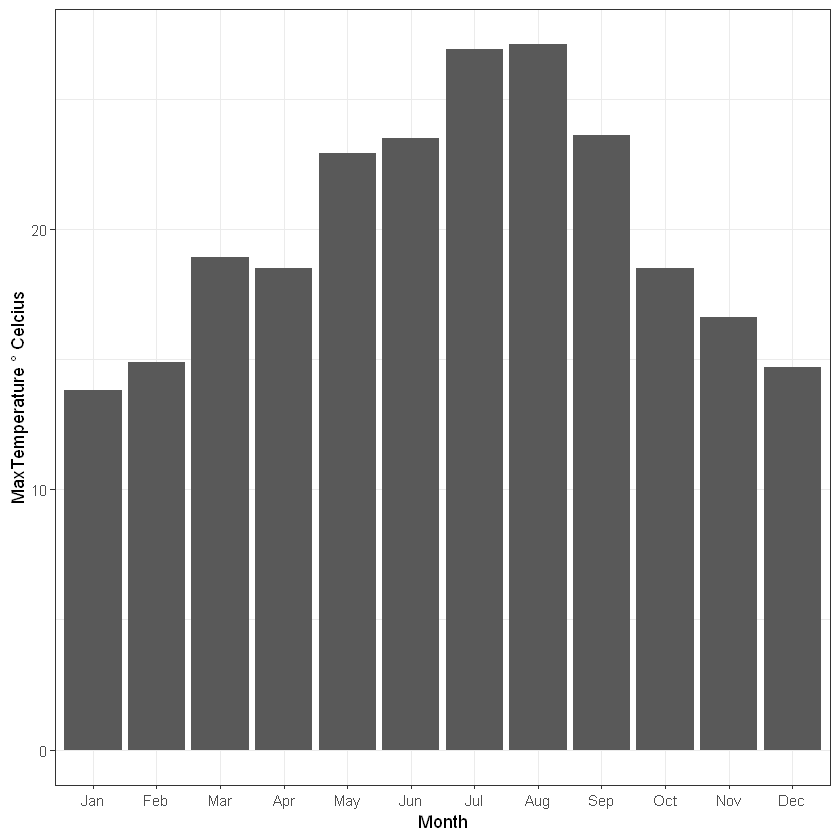

In [85]:
library(ggplot2)
library(gganimate)

# Assuming 'month' is a variable in dfdub that represents the month
# You may need to adjust this depending on the structure of your data

# Convert numeric month to month names
months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
dfdub$month_name <- factor(dfdub$month_name, levels = months)

# Static plot
p <- ggplot(
  dfdub, 
  aes(x = month_name, y = maxtp)
) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_viridis_d() +
  labs(x = "Month", y = "MaxTemperature ° Celcius", fill = "Year")

p


In [86]:
display_gif <- function(raw){
    contents <- base64enc::base64encode(raw)
    tag <- '<img src="data:image/gif;base64,%s">'
    IRdisplay::display_html(sprintf(tag, contents))
}

In [87]:
p + transition_time(year) +
  labs(title = "Year: {frame_time}")


Rendering [>-------------------------------------------] at 6.5 fps ~ eta: 15s

Rendering [>-------------------------------------------] at 6.8 fps ~ eta: 14s

Rendering [=>--------------------------------------------] at 7 fps ~ eta: 14s

Rendering [=>------------------------------------------] at 6.9 fps ~ eta: 14s

Rendering [==>-----------------------------------------] at 6.9 fps ~ eta: 14s

Rendering [==>-----------------------------------------] at 7.1 fps ~ eta: 13s

Rendering [===>------------------------------------------] at 7 fps ~ eta: 13s

Rendering [===>----------------------------------------] at 6.9 fps ~ eta: 13s

Rendering [===>----------------------------------------] at 6.7 fps ~ eta: 13s

Rendering [====>---------------------------------------] at 6.7 fps ~ eta: 13s

Rendering [=====>--------------------------------------] at 6.7 fps ~ eta: 13s

Rendering [======>-------------------------------------] at 6.7 fps ~ eta: 13s

Rendering [======>---------------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

In [103]:
mygif <- animate(p, width=1600, height=800, renderer=gifski_renderer(loop=TRUE))  
anim_save(filename="animation.gif", mygif)




Rendering [>-------------------------------------------] at 6.5 fps ~ eta: 15s

Rendering [>-------------------------------------------] at 5.4 fps ~ eta: 18s

Rendering [=>------------------------------------------] at 5.2 fps ~ eta: 18s

Rendering [==>-----------------------------------------] at 5.2 fps ~ eta: 18s

Rendering [==>-----------------------------------------] at 5.1 fps ~ eta: 18s

Rendering [===>------------------------------------------] at 5 fps ~ eta: 18s

Rendering [===>----------------------------------------] at 4.8 fps ~ eta: 19s

Rendering [===>----------------------------------------] at 4.5 fps ~ eta: 20s

Rendering [====>---------------------------------------] at 4.6 fps ~ eta: 19s

Rendering [=====>--------------------------------------] at 4.7 fps ~ eta: 19s

Rendering [=====>--------------------------------------] at 4.7 fps ~ eta: 18s

Rendering [======>-------------------------------------] at 4.8 fps ~ eta: 18s

Rendering [======>---------------------


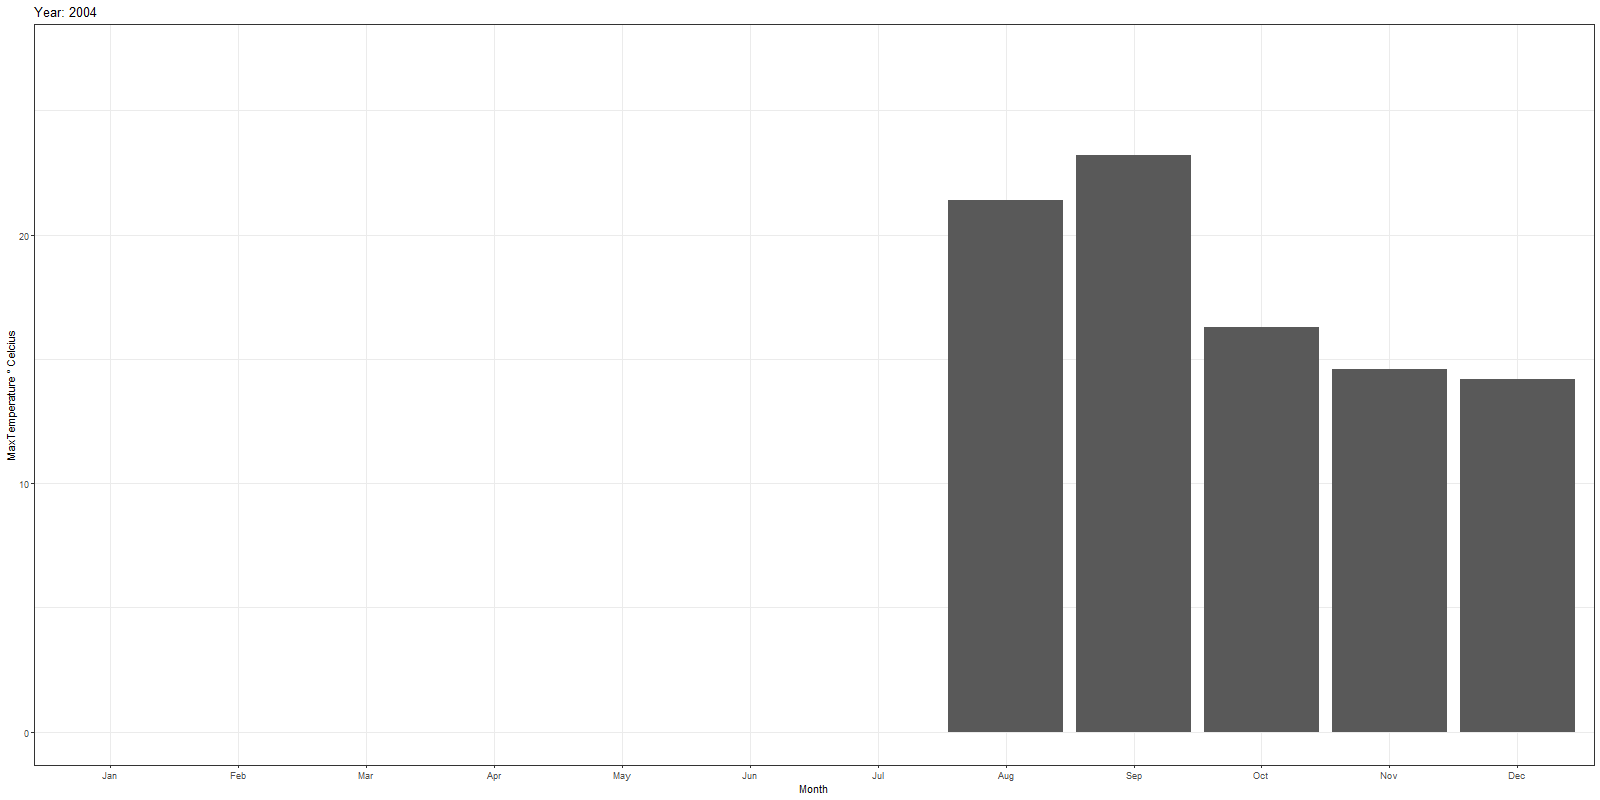

In [104]:
display_gif(file.path("animation.gif"))

## 7. Install and load the streamgraph package 
 - Copy the code from https://hrbrmstr.github.io/streamgraph/
 - Adapt the code, to show names around your own name.

With a new dataset:
- Read in the "vaccine-preventable-disease-cases-by-county-and-year-2.csv"
- Generate a streamgraph showing vaccinations across the years
    - You can decide on the breakdown of what is displayed.
